In [2]:
#Load libraries 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import time

In [3]:
#Preprocess dataset
df = pd.read_csv('datasetnewest4.csv')
df.head()

,148239.5,1,0.2,149211,1.1
0,138135.0,0.666667,0.466667,210478,1
1,226863.0,1.000000,0.200000,228424,1
2,210482.0,1.000000,0.200000,212674,1
3,233415.0,1.000000,0.200000,237036,1
4,217035.0,1.000000,0.200000,218946,1


In [4]:
df.shape

(2294, 5)

In [5]:
df.info

<bound method DataFrame.info of       148239.5         1       0.2  149211  1.1
0     138135.0  0.666667  0.466667  210478    1
1     226863.0  1.000000  0.200000  228424    1
2     210482.0  1.000000  0.200000  212674    1
3     233415.0  1.000000  0.200000  237036    1
4     217035.0  1.000000  0.200000  218946    1
...        ...       ...       ...     ...  ...
2289  151784.0  1.000000  0.200000  101189    1
2290  155608.5  1.000000  0.200000  103742    1
2291  154385.5  1.000000  0.200000  102924    1
2292  154957.0  1.000000  0.200000  103304    1
2293  138660.0  1.000000  0.200000   92440    1

[2294 rows x 5 columns]>

In [6]:
#Get all of the rows from the first four columns of the dataset
X = df.values[:,0:4]
#X = np.asarray(X).astype('int')
# Get all of the rows from the last column
y = df.values[:,4]

In [7]:
#Transform dataset
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.1, random_state = 4)
X_train=np.asarray(X_train).astype(np.int)
y_train=np.asarray(y_train).astype(np.int)

In [14]:
#Model ANN
model = Sequential([
    Dense(100, activation='relu', input_dim=4),
    Dense(150, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [15]:
#training model
hist = model.fit(X_train, y_train,
          batch_size=57, epochs=100, validation_split=0.2)

Epoch 1/100
29/29 [==============================] - 0s 3ms/step - loss: 0.2450 - accuracy: 0.6511 - val_loss: 0.2361 - val_accuracy: 0.6852
Epoch 2/100
29/29 [==============================] - 0s 1ms/step - loss: 0.2193 - accuracy: 0.6554 - val_loss: 0.1923 - val_accuracy: 0.6852
Epoch 3/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1775 - accuracy: 0.6784 - val_loss: 0.1691 - val_accuracy: 0.6852
Epoch 4/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1687 - accuracy: 0.6838 - val_loss: 0.1662 - val_accuracy: 0.6852
Epoch 5/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1680 - accuracy: 0.6808 - val_loss: 0.1663 - val_accuracy: 0.6852
Epoch 6/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1683 - accuracy: 0.6717 - val_loss: 0.1665 - val_accuracy: 0.6852
Epoch 7/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1675 - accuracy: 0.6899 - val_loss: 0.1664 - val_accuracy: 0.6852
Epoch 8/100
2

Epoch 59/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1673 - accuracy: 0.6899 - val_loss: 0.1661 - val_accuracy: 0.6852
Epoch 60/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1673 - accuracy: 0.6899 - val_loss: 0.1661 - val_accuracy: 0.6852
Epoch 61/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1675 - accuracy: 0.6899 - val_loss: 0.1662 - val_accuracy: 0.6852
Epoch 62/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1674 - accuracy: 0.6899 - val_loss: 0.1663 - val_accuracy: 0.6852
Epoch 63/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1674 - accuracy: 0.6899 - val_loss: 0.1661 - val_accuracy: 0.6852
Epoch 64/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1673 - accuracy: 0.6899 - val_loss: 0.1662 - val_accuracy: 0.6852
Epoch 65/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1674 - accuracy: 0.6899 - val_loss: 0.1661 - val_accuracy: 0.6852
Epoch 

In [16]:
model.save("model_ANN.h5")

In [17]:
data=[[1,2,3,4]]
prediction=model.predict(data)

Text(0.5, 51.0, 'Predicted')

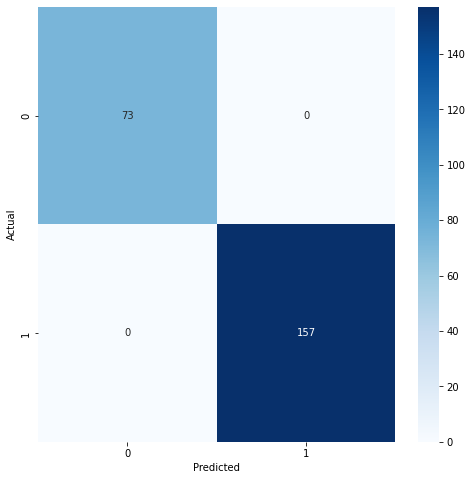

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt
y_pred=(model.predict(X_test)>0.8).astype("int32")
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [19]:
from sklearn.metrics import classification_report
print(f'Classification Report: \n {classification_report(y_test,y_pred)}')

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        73
         1.0       1.00      1.00      1.00       157

    accuracy                           1.00       230
   macro avg       1.00      1.00      1.00       230
weighted avg       1.00      1.00      1.00       230

